<a href="https://colab.research.google.com/github/MuhammadOwais444/Global-Cert-Internship/blob/main/Muhammad_Owais_task_2_week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement





**An online based retail store needs help with customer attrition and retention. They want to understand how to do all of it and also understand which customers fall in which group(e.g., likely to be churned out, likely to stay loyal, etc.) and what business actions can be taken accordingly.**

The problem is a classification problem as we have to group customers into classes.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:
#reading the data
data = pd.read_csv('retail_data.csv',encoding = 'unicode_escape')

In [ ]:
#shape of the dataset
data.shape

(541909, 8)

In [ ]:
#columns present in the dataset
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
#displays first 5 rows of the dataset
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
#type of data
data.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

As we can clearly see, there are 3 numerical features and 5 categorical features.

In [ ]:
#total unique values present in each column of the dataset
data.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [ ]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


We can observe that at an average, customers purchase goods worth 4.61.

In [ ]:
data.describe(include = 'object')

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,541909,541909,540455,541909,541909
unique,25900,4070,4223,23260,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,10/31/2011 14:41,United Kingdom
freq,1114,2313,2369,1114,495478


# Data cleaning

In [ ]:
#Finding total missing values from the dataframe
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

As we can observe, the columns 'Description' and 'CustomerID' have missing values.
Since, the column 'CustomerID' has no particular use in our data frame, we can drop this column and try handling the missing values from column 'Description'.

In [ ]:
#Remove missing values from CustomerID column, can ignore missing values in description column
data = data[pd.notnull(data['CustomerID'])]

#Validate if there are any negative values in Quantity column
data.Quantity.min()

-80995

In [ ]:
#Validate if there are any negative values in UnitPrice column
data.UnitPrice.min()

0.0

In [ ]:
#Filter out records with negative values
data = data[(data['Quantity']>0)]

In [ ]:
#Convert the string date field to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [ ]:
#Add new column depicting total amount
data['TotalAmount'] = data['Quantity'] * data['UnitPrice']


In [ ]:
#Check the shape (number of columns and rows) in the dataset after data is cleaned
data.shape

(397924, 9)

In [ ]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalAmount    0
dtype: int64

Now there are no Null/NaN values in the dataset.

In [ ]:
data.shape

(397924, 9)

In [ ]:
#to check if there are any duplicate entries in the dataset.
data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Length: 397924, dtype: bool

There are no duplicates present in the dataset.

**Checking for outliers**

In [ ]:
data.describe()

,Quantity,UnitPrice,CustomerID,TotalAmount
count,397924.000000,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171,22.394749
std,180.420210,22.096788,1713.169877,309.055588
min,1.000000,0.000000,12346.000000,0.000000
25%,2.000000,1.250000,13969.000000,4.680000
50%,6.000000,1.950000,15159.000000,11.800000
75%,12.000000,3.750000,16795.000000,19.800000
max,80995.000000,8142.750000,18287.000000,168469.600000


As we can see, Quantity and UnitPrice have outliers. As mean is sensitive to outliers but the mean values are very small as compared to the maximum values.

[Text(0.5, 1.0, 'Detecting outliers for Quantity')]

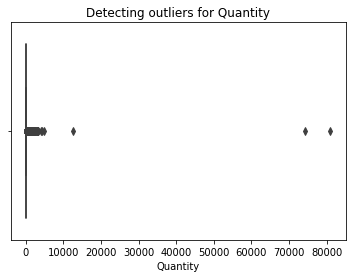

In [ ]:
sns.boxplot(x=data['Quantity']).set(title="Detecting outliers for Quantity")

[Text(0.5, 1.0, 'Detecting outliers for UnitPrice')]

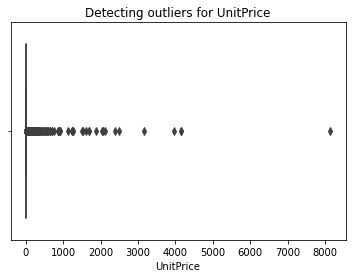

In [ ]:
sns.boxplot(x=data['UnitPrice']).set(title="Detecting outliers for UnitPrice")

As we can see there are a lot of outliers.

In [ ]:
#treating outliers
#couldn't fix the outliers as it was throwing error

# Some further insights in the data : Visualisation 


In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
data2 = data

In [ ]:
data2.describe()

,Quantity,UnitPrice,CustomerID,TotalAmount
count,397924.000000,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171,22.394749
std,180.420210,22.096788,1713.169877,309.055588
min,1.000000,0.000000,12346.000000,0.000000
25%,2.000000,1.250000,13969.000000,4.680000
50%,6.000000,1.950000,15159.000000,11.800000
75%,12.000000,3.750000,16795.000000,19.800000
max,80995.000000,8142.750000,18287.000000,168469.600000


In [ ]:
country_cust_data=data2[['Country','TotalAmount']].drop_duplicates()
country_cust_data.groupby(['Country'])['TotalAmount'].aggregate('count').reset_index().sort_values('TotalAmount', ascending=False)

,Country,TotalAmount
35,United Kingdom,2793
10,EIRE,559
14,Germany,501
13,France,476
23,Netherlands,426
0,Australia,347
30,Spain,325
32,Switzerland,260
26,Portugal,234
24,Norway,218


In [ ]:
df2 = country_cust_data.groupby(['Country'])['TotalAmount'].aggregate('count').reset_index().sort_values('TotalAmount', ascending=False).iloc[:4 , :]


In [ ]:
df2.head()

,Country,TotalAmount
35,United Kingdom,2793
10,EIRE,559
14,Germany,501
13,France,476


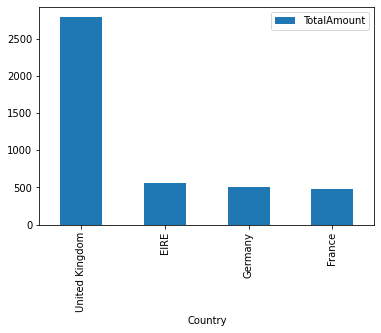

In [ ]:
df2.plot(x='Country', y='TotalAmount', kind = "bar")

We have appended four columns of InvoiceMonth, InvoiceDay, InvoiceYear and TotalPrice in the dataset for further analysis.

In [ ]:
plt.figure(figsize = (12,5))
sns.countplot(df2['Country'],['TotalAmount'])
plt.ylabel('Count of retails')
plt.xticks(rotation=90)

NameError: ignored

Maximum number of retails are in United Kindom followed by Germany, France and EIRE.

Most number of retails happened in the month of November followed by December and October.

Most retails happened on Thursday followed by Tuesday. 
No retail happened on Saturday.
Lowest number of retails happened on Sunday

Maximum number of sales happened in the year 2011.

# Modelling

In [ ]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,InvoiceMonth,InvoiceDay,InvoiceYear,TotalPrice
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,France,December,Friday,2011,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,France,December,Friday,2011,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,France,December,Friday,2011,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,France,December,Friday,2011,16.60
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,France,December,Friday,2011,14.85


In [ ]:
#Recency = Latest Date - Last Inovice Data, Frequency = count of invoice no. of transaction(s), Monetary = Sum of Total 
#Amount for each customer
import datetime as dt

#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

#Create RFM Modelling scores for each customer
RFMScores = data.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})

#Convert Invoice Date into type int
RFMScores['InvoiceDate'] = RFMScores['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
RFMScores.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'TotalAmount': 'Monetary'}, inplace=True)

RFMScores.reset_index().head()


,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40


In [ ]:
#Split into four segments using quantiles
quantiles = RFMScores.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [ ]:
quantiles

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.5},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 100.0},
 'Monetary': {0.25: 307.24499999999995, 0.5: 674.4499999999998, 0.75: 1661.64}}

In [ ]:
#Functions to create R, F and M segments
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [ ]:
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
RFMScores['R'] = RFMScores['Recency'].apply(RScoring, args=('Recency',quantiles,))
RFMScores['F'] = RFMScores['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
RFMScores['M'] = RFMScores['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12347.0,2,182,4310.00,1,1,1
12348.0,75,31,1797.24,3,3,1
12349.0,18,73,1757.55,2,2,1
12350.0,310,17,334.40,4,4,3


In [ ]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
RFMScores['RFMGroup'] = RFMScores.R.map(str) + RFMScores.F.map(str) + RFMScores.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
RFMScores['RFMScore'] = RFMScores[['R', 'F', 'M']].sum(axis = 1)
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9
12347.0,2,182,4310.00,1,1,1,111,3
12348.0,75,31,1797.24,3,3,1,331,7
12349.0,18,73,1757.55,2,2,1,221,5
12350.0,310,17,334.40,4,4,3,443,11


In [ ]:
#Assign Loyalty Level to each customer
Loyalty_Level = ['Platinum', 'Gold', 'Silver', 'Bronze']
Score_cuts = pd.qcut(RFMScores.RFMScore, q = 4, labels = Loyalty_Level)
RFMScores['RFM_Loyalty_Level'] = Score_cuts.values
RFMScores.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,12346.0,325,1,77183.60,4,4,1,441,9,Silver
1,12347.0,2,182,4310.00,1,1,1,111,3,Platinum
2,12348.0,75,31,1797.24,3,3,1,331,7,Gold
3,12349.0,18,73,1757.55,2,2,1,221,5,Platinum
4,12350.0,310,17,334.40,4,4,3,443,11,Bronze


In [ ]:
#Validate the data for RFMGroup = 111
RFMScores[RFMScores['RFMGroup']=='111'].sort_values('Monetary', ascending=False).reset_index().head(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,14646.0,1,2080,280206.02,1,1,1,111,3,Platinum
1,18102.0,0,431,259657.30,1,1,1,111,3,Platinum
2,17450.0,8,337,194550.79,1,1,1,111,3,Platinum
3,14911.0,1,5677,143825.06,1,1,1,111,3,Platinum
4,14156.0,9,1400,117379.63,1,1,1,111,3,Platinum
5,17511.0,2,963,91062.38,1,1,1,111,3,Platinum
6,16684.0,4,277,66653.56,1,1,1,111,3,Platinum
7,14096.0,4,5111,65164.79,1,1,1,111,3,Platinum
8,13694.0,3,568,65039.62,1,1,1,111,3,Platinum
9,15311.0,0,2379,60767.90,1,1,1,111,3,Platinum


In [ ]:
RFMScores.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,12346.0,325,1,77183.60,4,4,1,441,9,Silver
1,12347.0,2,182,4310.00,1,1,1,111,3,Platinum
2,12348.0,75,31,1797.24,3,3,1,331,7,Gold
3,12349.0,18,73,1757.55,2,2,1,221,5,Platinum
4,12350.0,310,17,334.40,4,4,3,443,11,Bronze


In [ ]:
level_data=RFMScores.reset_index()[['RFM_Loyalty_Level','CustomerID']].drop_duplicates()
level_data.groupby(['RFM_Loyalty_Level'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID', ascending=False)

,RFM_Loyalty_Level,CustomerID
1,Gold,1324
0,Platinum,1263
2,Silver,982
3,Bronze,770


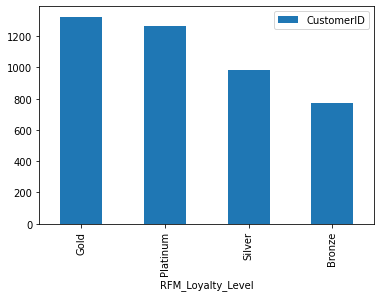

In [ ]:
level_data.groupby(['RFM_Loyalty_Level'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID', ascending=False).plot(x = "RFM_Loyalty_Level", y = "CustomerID", kind = "bar")
plt.show()